<a href="https://colab.research.google.com/github/huskeypm/foldingML/blob/main/ablim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ABLIM1 seq
MPAFLGLKCLGKLCSSEKSKVTSSERTSARGSNRKRLIVEDRRVSGTSFTAHRRATITHLLYLCPKDYCPRGRVCNSVDPFVAHPQDPHHPSEKPVIHCHKCGEPCKGEVLRVQTKHFHIKCFTCKVCGCDLAQGGFFIKNGEYLCTLDYQRMYGTRCHGCGEFVEGEVVTALGKTYHPNCFACTICKRPFPPGDRVTFNGRDCLCQLCAQPMSSSPKETTFSSNCAGCGRDIKNGQALLALDKQWHLGCFKCKSCGKVLTGEYISKDGAPYCEKDYQGLFGVKCEACHQFITGKVLEAGDKHYHPSCARCSRCNQMFTEGEEMYLQGSTVWHPDCKQSTKTEEKLRPTRTSSESIYSRPGSSIPGSPGHTIYAKVDNEILDYKDLAAIPKVKAIYDIERPDLITYEPFYTSGYDDKQERQSLGESPRTLSPTPSAEGYQDVRDRMIHRSTSQGSINSPVYSRHSYTPTTSRSPQHFHRPGNEPSSGRNSPLPYRPDSRPLTPTYAQAPKHFHVPDQGINIYRKPPIYKQHAALAAQSKSSEDIIKFSKFPAAQAPDPSETPKIETDHWPGPPSFAVVGPDMKRRSSGREEDDEELLRRRQLQEEQLMKLNSGLGQLILKEEMEKESRERSSLLASRYDSPINSASHIPSSKTASLPGYGRNGLHRPVSTDFAQYNSYGDVSGGVRDYQTLPDGHMPAMRMDRGVSMPNMLEPKIFPYEMLMVTNRGRNKILREVDRTRLERHLAPEVFREIFGMSIQEFDRLPLWRRNDMKKKAKLF

In [ ]:
import numpy as np
import matplotlib.pylab as plt

ABLIM2 seq
MSAVSQPQAAPSPLEKSPSTAILCNTCGNVCKGEVLRVQDKYFHIKCFVCKACGCDLAEGGFFVRQGEYICTLDYQRLYGTRCFSCDQFIEGEVVSALGKTYHPDCFVCAVCRLPFPPGDRVTFNGKECMCQKCSLPVSVGSSAHLSQGLRSCGGCGTEIKNGQALVALDKHWHLGCFKCKSCGKLLNAEYISKDGLPYCEADYHAKFGIRCDSCEKYITGRVLEAGEKHYHPSCALCVRCGQMFAEGEEMYLQGSSIWHPACRQAARTEDRNKETRTSSESIISVPASSTSGSPSRVIYAKLGGEILDYRDLAALPKSKAIYDIDRPDMISYSPYISHSAGDRQSYGEGDQDDRSYKQCRTSSPSSTGSVSLGRYTPTSRSPQHYSRPGSESGRSTPSLSVLSDSKPPPSTYQQAPRHFHVPDTGVKDNIYRKPPIYRQHAARRSDGEDGSLDQDNRKKSSWLMLKGDADTRTNSPDLDTQSLSHSSGTDRDPLQRMAGDSFHSRFPYSKSDPLPGHGKNGLDQRNANLAPCGADPDASWGMREYKIYPYDSLIVTNRIRVKLPKDVDRTRLERHLSPEEFQEVFGMSIEEFDRLALWKRNDLKKKALLF

* ABLIM1's LIM domains span 97-343
* ABLIM2's LIM domains span 22-270
Aligned sequences using blast




In [ ]:
fastaAblim1='MPAFLGLKCLGKLCSSEKSKVTSSERTSARGSNRKRLIVEDRRVSGTSFTAHRRATITHLLYLCPKDYCPRGRVCNSVDPFVAHPQDPHHPSEKPVIHCHKCGEPCKGEVLRVQTKHFHIKCFTCKVCGCDLAQGGFFIKNGEYLCTLDYQRMYGTRCHGCGEFVEGEVVTALGKTYHPNCFACTICKRPFPPGDRVTFNGRDCLCQLCAQPMSSSPKETTFSSNCAGCGRDIKNGQALLALDKQWHLGCFKCKSCGKVLTGEYISKDGAPYCEKDYQGLFGVKCEACHQFITGKVLEAGDKHYHPSCARCSRCNQMFTEGEEMYLQGSTVWHPDCKQSTKTEEKLRPTRTSSESIYSRPGSSIPGSPGHTIYAKVDNEILDYKDLAAIPKVKAIYDIERPDLITYEPFYTSGYDDKQERQSLGESPRTLSPTPSAEGYQDVRDRMIHRSTSQGSINSPVYSRHSYTPTTSRSPQHFHRPGNEPSSGRNSPLPYRPDSRPLTPTYAQAPKHFHVPDQGINIYRKPPIYKQHAALAAQSKSSEDIIKFSKFPAAQAPDPSETPKIETDHWPGPPSFAVVGPDMKRRSSGREEDDEELLRRRQLQEEQLMKLNSGLGQLILKEEMEKESRERSSLLASRYDSPINSASHIPSSKTASLPGYGRNGLHRPVSTDFAQYNSYGDVSGGVRDYQTLPDGHMPAMRMDRGVSMPNMLEPKIFPYEMLMVTNRGRNKILREVDRTRLERHLAPEVFREIFGMSIQEFDRLPLWRRNDMKKKAKLF'

## CIDER

In [3]:
!pip3 install localcider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.4 MB/s eta 0:00:00
  Created wheel for localcider: filename=localcider-0.1.21-py3-none-any.whl size=116025 sha256=0b4c0a5e46d3fd1a78176f5baf179e18f1b1f06ae18429ee5645d7d61bfbbbed
  Stored in directory: /root/.cache/pip/wheels/f3/81/3a/bc50ee0a0b35baa984d81c6c72e31316c88c11b33318d05a76
Successfully built localcider


In [4]:
import numpy as np
import matplotlib.pylab as plt
import localcider
from localcider.sequenceParameters import SequenceParameters
from localcider import plots
import re
import os

entire protein


In [ ]:
data = SequenceParameters(fastaAblim1)
fp = data.get_fraction_positive()
fn = data.get_fraction_negative()

print(fp,fn)

0.14267352185089974 0.11439588688946016


N-terminus/C-terminus

In [ ]:
nTerm = fastaAblim1[0:50]
data = SequenceParameters(nTerm)
fp = data.get_fraction_positive()
fn = data.get_fraction_negative()

print(fp,fn)


cTerm = fastaAblim1[:-300]
data = SequenceParameters(cTerm)
fp = data.get_fraction_positive()
fn = data.get_fraction_negative()

print(fp,fn)


0.22 0.08
0.13389121338912133 0.10460251046025104


In [ ]:
cTerm

'MPAFLGLKCLGKLCSSEKSKVTSSERTSARGSNRKRLIVEDRRVSGTSFTAHRRATITHLLYLCPKDYCPRGRVCNSVDPFVAHPQDPHHPSEKPVIHCHKCGEPCKGEVLRVQTKHFHIKCFTCKVCGCDLAQGGFFIKNGEYLCTLDYQRMYGTRCHGCGEFVEGEVVTALGKTYHPNCFACTICKRPFPPGDRVTFNGRDCLCQLCAQPMSSSPKETTFSSNCAGCGRDIKNGQALLALDKQWHLGCFKCKSCGKVLTGEYISKDGAPYCEKDYQGLFGVKCEACHQFITGKVLEAGDKHYHPSCARCSRCNQMFTEGEEMYLQGSTVWHPDCKQSTKTEEKLRPTRTSSESIYSRPGSSIPGSPGHTIYAKVDNEILDYKDLAAIPKVKAIYDIERPDLITYEPFYTSGYDDKQERQSLGESPRTLSPTPSAEGYQDVRDRMIHRSTSQGSINSPVYSRHSYTPTTSRSPQHFH'

## Worm like chain model


Assuming here that
* villin headpiece remains bound to actin
* LIMs 2 and 3 are available to bind titin
* LIMs 2 and 3 availability are modulated by MSSSP phosphorylation (between LIMs 2 and 3)


In [8]:
zeta = 0.35 #persistence length [nm]
lenPerResi = 0.34 # [nm]
#D = 53 *lenPerResi   # Residue between CaMBR C termimus (R414) and AID N-terminus (I467) is 52 a.a.
                     # thus the distance should be 3.4 x 53
#L = 8 * lenPerResi  # residue number between C-terminal of DH and N terminus of AID (DH is absorbed on CaM's surface)

# for the effective concentration
def G_DZL(zeta,D,L):
    prefac = np.sqrt(3/(4*np.pi*zeta*L))
    prefac =prefac*prefac*prefac
    expon = -3*D*D/(4*zeta*L)
    return prefac * np.exp(expon)

# for R**2, see Eqn 5 in the mapid paper
def RR_ZL(zeta,L):
    L = float(L)
    prefac = 2*zeta * L
    expon = np.exp(-L/zeta)
    expon = (zeta/L) * (1-expon)
    expon = 1 - expon
    return prefac * expon

RR_ZL = np.vectorize( RR_ZL )

In [ ]:
# prompt: twiny plot example

fig, ax1 = plt.subplots()

ax1.plot([1, 2, 3], [1, 2, 3], label='plot 1')
ax1.set_xlabel('x-axis')
ax1.set_ylabel('y-axis 1')

ax2 = ax1.twinx()  # Create a twin y-axis
ax2.plot([1, 2, 3], [4, 5, 6], color='red', label='plot 2')
ax2.set_ylabel('y-axis 2')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()


Text(0.5, 0, 'Num. aa')

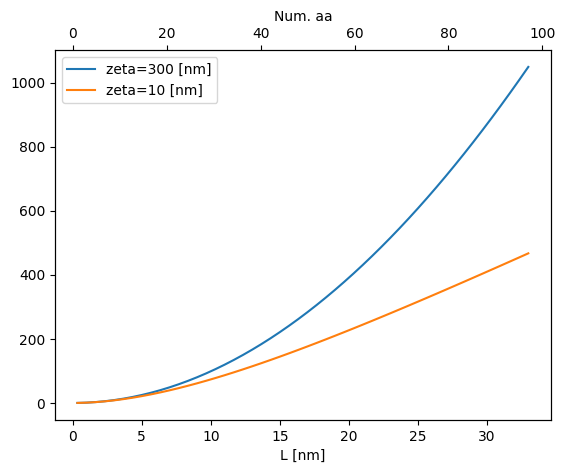

In [25]:
fig,ax = plt.subplots()


nRes = np.linspace(1,97)
Ls = nRes * lenPerResi # [nm]
zeta = 300 # [nm]
rr = RR_ZL(zeta,Ls)
ax.plot(Ls,rr, label=f"zeta={zeta} [nm]")

zeta = 10 # [nm]
rr = RR_ZL(zeta,Ls)
ax.plot(Ls,rr, label=f"zeta={zeta} [nm]")
ax.set_xlabel("L [nm]")
ax.legend()

axt = ax.twiny()
axt.plot(nRes,rr,lw=0)
axt.set_xlabel("Num. aa")

These all need to be double checked relative to the original Shoemaker(?) and Philips paper.

In [ ]:
Ang_to_nm = 0.1
Ang_per_res = 3.4 # [A]

D = 40*2 * Ang_to_nm # about 40 Ang across for 2 LIM domains
print (D, " [nm]")


aaNterm = 98
L_freeN = aaNterm * Ang_per_res * Ang_to_nm # M1-M98
print (L_freeN, " [nm]")

aaCterm = 358. ; print("double check")
L_freeC = aaCterm * Ang_per_res * Ang_to_nm # Q338-M696
print (L_freeC, " [nm]")

# 2 LIM domains (not four?)
print("Need actual radii of gyration")
twoLIM=4*2 # 40 A per lim, 2 of them.
MSSSPseq = 5*Ang_to_nm * Ang_to_nm
fourLIM = twoLIM + MSSSPseq + twoLIM

8.0  [nm]
33.32  [nm]
double check
121.72000000000001  [nm]
Need actual radii of gyration


In [ ]:
## We will use the Kd2= 0.565 uM of AID from experimnts as the reference unit

# PKH I think we want the distance from a bound villin headpiece to the first LIM domain
#tether_length = np.array([L_freeN,L_freeC])
unphospho=L_freeC+fourLIM   # extended
phospho = L_freeC + twoLIM
tether_length = np.array([unphospho,phospho])

conc = G_DZL(zeta,D,tether_length)

#reference point
ref_conc = conc[0]
ref_unit = 1. #fit_tAID.  TBD

effective_conc = (conc/ref_conc)*ref_unit


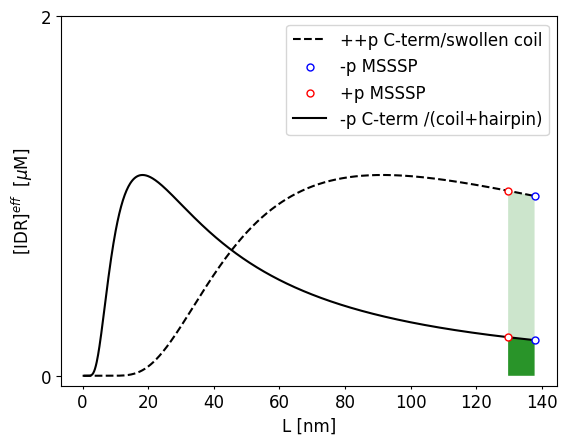

In [ ]:
plt.rcParams['font.size']=12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#['figure.figsize'] = 2,1


# C-terminus
res = 1
Lmin = res*Ang_per_res * Ang_to_nm  # tether length [nm]
#res = aaCterm
#Lmax = res*Ang_per_res * Ang_to_nm  # tether length [nm]
Lmax =tether_length[0] # extended
Ls = np.linspace(Lmin,Lmax,1000)

#L_per_res = 0.34 #nm
#zeta=3


ls = np.linspace(tether_length[1],tether_length[0],10)

# Flexible (e.g. Cterminal end is highly phosphorylated)
fig, ax1 = plt.subplots()
ys = (G_DZL(zeta,D,Ls)/ref_conc)*ref_unit
ax1.plot(Ls, ys,'k--',label='++p C-term/swollen coil')
conc = G_DZL(zeta,D,tether_length)
effective_conc = (conc/ref_conc)*ref_unit
ax1.scatter(tether_length[0],effective_conc[0],facecolor='white',edgecolor='blue',s=25,zorder=3,label='-p MSSSP')
ax1.scatter(tether_length[1],effective_conc[1],facecolor='white',edgecolor='red',s=25,zorder=3,label='+p MSSSP')

ys = (G_DZL(zeta,D,ls)/ref_conc)*ref_unit
ax1.fill_between(ls, ys, edgecolor='none',facecolor='green', alpha=0.2)

# Stiffer (C terminal comprises series of moderately-folded domains)
zetaS=zeta*5.
ys = (G_DZL(zetaS,D,Ls)/ref_conc)*ref_unit
ax1.plot(Ls, ys,'k-',label='-p C-term /(coil+hairpin)')
conc = G_DZL(zetaS,D,tether_length)
effective_conc = (conc/ref_conc)*ref_unit
ax1.scatter(tether_length[0],effective_conc[0],facecolor='white',edgecolor='blue',s=25,zorder=3)#,label='N-term')
ax1.scatter(tether_length[1],effective_conc[1],facecolor='white',edgecolor='red',s=25,zorder=3)#,label='C-term')

ys = (G_DZL(zetaS,D,ls)/ref_conc)*ref_unit
ax1.fill_between(ls, ys, edgecolor='none',facecolor='green', alpha=0.8)

#####
ax1.set_xlabel("L [nm]")#fontsize=8)
ax1.legend(
    #fontsize=10.5,
    loc=0)#(0.5,0.6), ncol=1)

#ax2.tick_params(labelsize=8)
#ax1.tick_params(labelsize=7)
ax1.set_ylabel("[IDR]$^{eff}$  [$\mu$M]")#,fontsize=8)
ax1.set_yticks([0,2])#,6,8,10])


plt.gcf().savefig("effconc.png",dpi=300)

Doing some back of the envelope calculations for the myofilament.
The N-terminal fragment of ABLIM1 is ca 97 a.a. A 100 aa fragment would be about 34 nm if end to end. In the WLC model, $R^2$ is 23 nm$^2$ or $R=4.8$.




In [ ]:
import numpy as np
aaNterm = 97
L_freeN = aaNterm * Ang_per_res * Ang_to_nm # M1-M98
print (L_freeN, " [nm]")
rsqd = RR_DZL(zeta,L_freeN)
print("R^2: %3.1f [nm]"%rsqd)
print("sqrt(R^2): %3.1f [nm]"%np.sqrt(rsqd))

32.980000000000004  [nm]
R^2: 22.8
sqrt(R^2): 4.8 [nm]


The entire sequence is about 780 a.a. Sqrt of the squared distance suggests an avg distance of 13.6 nm.  

In [ ]:
aaNterm = 780
L_freeN = aaNterm * Ang_per_res * Ang_to_nm # M1-M98
print (L_freeN, " [nm]")
rsqd = RR_DZL(zeta,L_freeN)
print("R^2: %3.1f [nm]"%rsqd)
print("sqrt(R^2): %3.1f [nm]"%np.sqrt(rsqd))

265.2  [nm]
R^2: 185.4 [nm]
sqrt(R^2): 13.6 [nm]
